# California Housing Price Prediction.

## Imports

In [1]:
# Data exploration imports
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import numpy as np
import warnings
warnings.filterwarnings(action="ignore")
import re
import matplotlib.pyplot as plt

## 1) Loading the CSV File.

In [2]:
CH_data = pd.read_excel("California_housing.xlsx") 

In [3]:
CH_data.head(6)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700


In [4]:
CH_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [5]:
CH_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [6]:
CH_data.shape

(20640, 10)

In [7]:
CH_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## 2)HANDELING THE NULL VALUES

In [8]:
CH_data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [9]:
# So, we have 207 null values. We can drop the rows with null values or we can replace the null values.
# 207 is too big a number to drop rows
# CHF is the california housing final dataset
CHF_data = CH_data.fillna(CH_data.mean())

In [10]:
CHF_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [11]:
CHF_data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

### Correlation between the variables.

In [12]:
CHF_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [13]:
CHF_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000


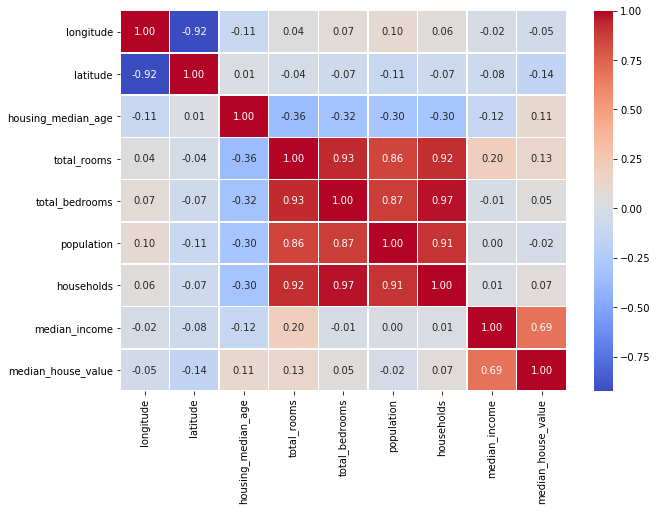

In [14]:
f,ax = plt.subplots(figsize=(10, 7))
sns.heatmap(CHF_data.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax,cmap= 'coolwarm')
plt.show()

In [15]:
CHF_data.corr().sort_values(ascending=False, by = 'median_house_value').median_house_value

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049454
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

## 3) ENCODING categorical variables.

In [16]:
CHF_data.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

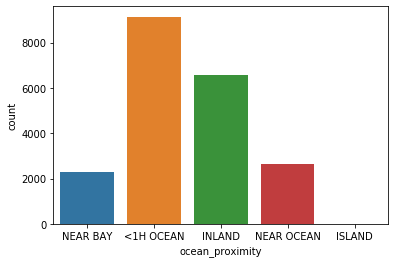

In [17]:
sns.countplot(CHF_data.ocean_proximity)

In [18]:
# Using Dummies
new_val = pd.get_dummies(CHF_data.ocean_proximity)

In [19]:
new_val.head(5)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [20]:
CHF_data[new_val.columns] = new_val

In [21]:
CHF_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value', '<1H OCEAN', 'INLAND',
       'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [22]:
CHF_data = CHF_data[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'
       , '<1H OCEAN', 'INLAND',
       'ISLAND', 'NEAR BAY', 'NEAR OCEAN','median_house_value']]

In [23]:
CHF_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,0,0,1,0,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0,0,0,1,0,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0,0,0,1,0,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0,0,0,1,0,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0,0,0,1,0,342200


###  Correlation and Density graphs

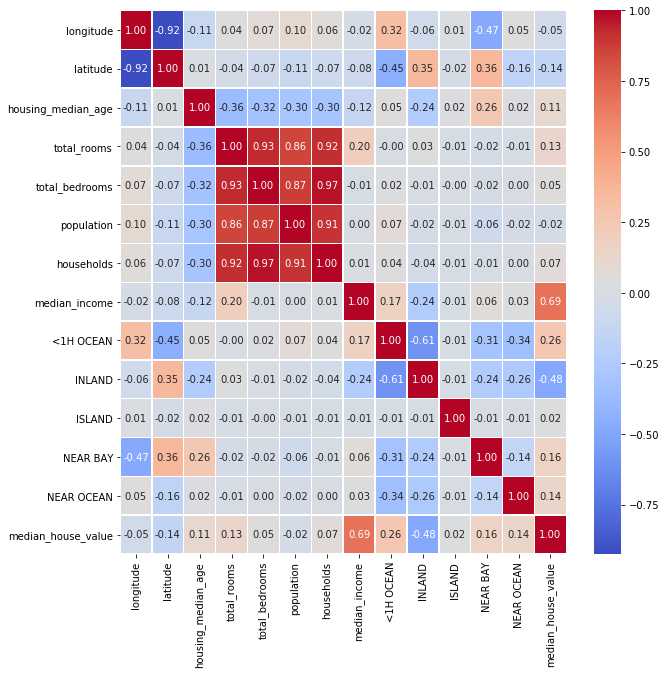

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(CHF_data.corr(), annot=True, linewidths=.5, fmt= '.2f',cmap= 'coolwarm')

In [25]:
CHF_data.corr().sort_values(ascending=False, by = 'median_house_value').median_house_value

median_house_value    1.000000
median_income         0.688075
<1H OCEAN             0.256617
NEAR BAY              0.160284
NEAR OCEAN            0.141862
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049454
ISLAND                0.023416
population           -0.024650
longitude            -0.045967
latitude             -0.144160
INLAND               -0.484859
Name: median_house_value, dtype: float64

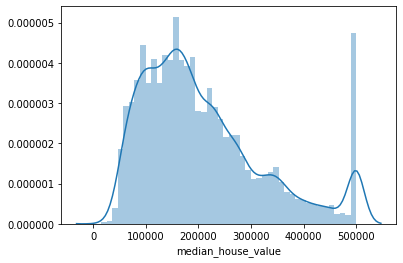

In [26]:
sns.distplot(CHF_data.median_house_value)

## 4) Standardize data :

In [27]:
# Data preprocessing Libraries :
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

In [28]:
convert = preprocessing.StandardScaler() 

In [29]:
feature = CHF_data.drop(['median_house_value'], axis=1)
label = CHF_data.median_house_value

In [30]:
featureT = convert.fit_transform(feature.values)
labelT = convert.fit_transform(CHF_data.median_house_value.values.reshape(-1,1)).flatten() 

In [31]:
featureT

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.01556621,
         2.83074203, -0.38446649],
       [-1.32284391,  1.04318455, -0.60701891, ..., -0.01556621,
         2.83074203, -0.38446649],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.01556621,
         2.83074203, -0.38446649],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.01556621,
        -0.35326426, -0.38446649],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.01556621,
        -0.35326426, -0.38446649],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.01556621,
        -0.35326426, -0.38446649]])

In [32]:
labelT

array([ 2.12963148,  1.31415614,  1.25869341, ..., -0.99274649,
       -1.05860847, -1.01787803])

## 5) Spliting the data into TRAIN & TEST(80%,20%)

In [33]:
# Default split is 80% and 20%.
feature_train, feature_test,label_train, label_test = train_test_split(featureT,labelT, test_size=0.2, random_state=19)       

## 6) Linear regression

In [34]:
linear_reg = linear_model.LinearRegression()
linear_reg.fit(feature_train,label_train)
r2_score(linear_reg.predict(feature_train),label_train)

0.4570190325788084

In [35]:
cross_val_score(linear_reg, feature_train,label_train, cv=10) 

array([0.6832958 , 0.62142489, 0.63597643, 0.64038056, 0.63004248,
       0.64008938, 0.63400562, 0.65864776, 0.66107922, 0.66008994])

In [36]:
reg_score = r2_score(linear_reg.predict(feature_test),label_test) 

In [37]:
reg_score

0.4409719416753213

In [38]:
linear_reg.coef_

array([-4.59642711e-01, -4.69577288e-01,  1.12380994e-01, -7.76067181e-02,
        2.60362480e-01, -4.40717690e-01,  2.92638624e-01,  6.32436962e-01,
        6.37219427e+10,  5.97145838e+10,  1.99652046e+09,  4.02923225e+10,
        4.29717471e+10])

In [39]:
pd.DataFrame(linear_reg.coef_, index=feature.columns, columns=['Coefficient']).sort_values(ascending=False, by = 'Coefficient')

,Coefficient
<1H OCEAN,6.372194e+10
INLAND,5.971458e+10
NEAR OCEAN,4.297175e+10
NEAR BAY,4.029232e+10
ISLAND,1.996520e+09
median_income,6.324370e-01
households,2.926386e-01
total_bedrooms,2.603625e-01
housing_median_age,1.123810e-01
total_rooms,-7.760672e-02


## 7)  Bonus exercise: Perform Linear Regression with one independent variable :

In [48]:
train, test = train_test_split(CH_data, test_size=0.2, random_state=21)
print(len(train), len(test))

16512 4128


In [49]:
X_train = train.drop('median_house_value', axis=1)
y_train = train['median_house_value'].copy()
X_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16341.000000,16512.000000,16512.000000,16512.000000
mean,-119.567533,35.625190,28.642987,2634.507146,538.463986,1425.778585,500.156674,3.860417
std,2.000296,2.127338,12.537105,2168.182120,417.394434,1106.975375,378.902749,1.896723
min,-124.300000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.790000,33.930000,18.000000,1452.000000,297.000000,792.000000,281.000000,2.557875
50%,-118.490000,34.250000,29.000000,2127.000000,436.000000,1168.000000,410.000000,3.519200
75%,-118.010000,37.710000,37.000000,3153.000000,648.000000,1729.000000,606.000000,4.732575
max,-114.470000,41.950000,52.000000,37937.000000,6445.000000,28566.000000,6082.000000,15.000100


In [50]:
option1 = CH_data.dropna(subset=['total_bedrooms'])
option2 = CH_data.drop('total_bedrooms', axis=1)
median_num_bedrooms = CH_data['total_bedrooms'].median()
CH_data['total_bedrooms'].fillna(median_num_bedrooms, inplace=True)

In [51]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
df_num = CH_data.drop("ocean_proximity", axis=1)
imputer.fit(df_num)
print(imputer.statistics_)
print(df_num.median().values)

[-1.1849e+02  3.4260e+01  2.9000e+01  2.1270e+03  4.3500e+02  1.1660e+03
  4.0900e+02  3.5348e+00  1.7970e+05]
[-1.1849e+02  3.4260e+01  2.9000e+01  2.1270e+03  4.3500e+02  1.1660e+03
  4.0900e+02  3.5348e+00  1.7970e+05]


In [52]:
X = imputer.transform(df_num)
# X is a raw numpy array, turn it back into a dataframe
X = pd.DataFrame(X, columns=df_num.columns)
X.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [53]:
df_cat = CH_data[['ocean_proximity']]
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
df_cat_encoded = ordinal_encoder.fit_transform(df_cat)
# go back to a dataframe from the raw NumPy array outputted 
df_cat_encoded = pd.DataFrame(df_cat_encoded, columns=df_cat.columns)
print(df_cat_encoded["ocean_proximity"].value_counts())
print(ordinal_encoder.categories_)

0.0    9136
1.0    6551
4.0    2658
3.0    2290
2.0       5
Name: ocean_proximity, dtype: int64
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [54]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
df_cat_1hot = cat_encoder.fit_transform(df_cat)
df_cat_1hot

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [55]:
print(df_cat_1hot.toarray())

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [56]:
from sklearn.compose import ColumnTransformer
df1 = train.drop('median_house_value', axis=1)
num_attrs = list(df1)
num_attrs.remove("ocean_proximity")
cat_attrs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
        ("num", SimpleImputer(strategy='median'),num_attrs),
        ("cat", OneHotEncoder(), cat_attrs),
    ])
X = full_pipeline.fit_transform(df1)
print(X)

[[-117.57   33.88   39.   ...    0.      0.      0.  ]
 [-121.2    39.23    9.   ...    0.      0.      0.  ]
 [-118.37   34.16   40.   ...    0.      0.      0.  ]
 ...
 [-117.88   34.13   33.   ...    0.      0.      0.  ]
 [-118.45   34.04   22.   ...    0.      0.      0.  ]
 [-117.37   33.19   23.   ...    0.      0.      1.  ]]


In [57]:
y = train['median_house_value'].values
print(y)

[110600 213300 282300 ... 185500 283300 173800]


In [58]:
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [59]:
print(lin_reg.predict( X[:5]))
print(y[:5])

[105024. 170112. 265088. 264128.  90112.]
[110600 213300 282300 269900  97400]


In [60]:
from sklearn.metrics import mean_squared_error
preds = lin_reg.predict(X)
mse = mean_squared_error(y, preds)
print(np.sqrt(mse))

68251.17878670366
